### Import Libraries

In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller

#### CSV to Data Frame

In [2]:
cpih_data = pd.read_csv("cpih_data.csv", index_col=0, parse_dates=True)

### First Plot of Data

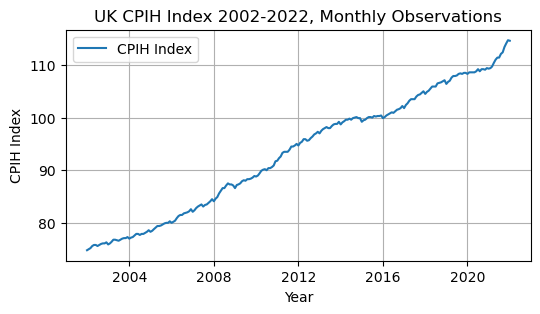

In [17]:
plt.figure(figsize=(6, 3))
plt.plot(cpih_data.index, cpih_data['CPIH'], label="CPIH Index")
plt.title("UK CPIH Index 2002-2022, Monthly Observations")
plt.xlabel("Year")
plt.ylabel("CPIH Index")
plt.legend()
plt.grid(True)
plt.show()

# Stationarity Analysis


### ADF Test Functions

In [37]:
# Augmented Dickey-Fuller Test (NO TREND).
def adf_test(timeseries):
    print("Results of DF test:")
    dftest = adfuller(
        timeseries,
        maxlag=None,
        regression="c",
        autolag="AIC",
        store=False,
        regresults=False
    )
    dfoutput = pd.Series(
        dftest[0:4],
        index=[
            "Test Statistic",
            "p-value",
            "# Lags Used",
            "Number of Observations Used"
        ],
    )
    for key, value in dftest[4].items():
        dfoutput["Critical Value (%s)" % key] = value
    print(dfoutput)

# Augmented Dickey-Fuller Test + CONTINUOUS TREND (ct).
def adf_test_ct(timeseries):
    print("Results of DF test (+ CT):")
    dftest = adfuller(
        timeseries,
        maxlag=None,
        regression="ct",
        autolag="AIC",
        store=False,
        regresults=False
    )
    dfoutput = pd.Series(
        dftest[0:4],
        index=[
            "Test Statistic",
            "p-value",
            "# Lags Used",
            "Number of Observations Used"
        ],
    )
    for key, value in dftest[4].items():
        dfoutput["Critical Value (%s)" % key] = value
    print(dfoutput)

#### ADF Test

In [33]:
# NULL HYPOTHESIS: CPIH has a unit root.
cpih_adf_score = adf_test_ct(cpih_data["CPIH"])

Results of DF test (+ CT):
Test Statistic                  -2.621179
p-value                          0.270241
# Lags Used                     14.000000
Number of Observations Used    226.000000
Critical Value (1%)             -3.999396
Critical Value (5%)             -3.430097
Critical Value (10%)            -3.138569
dtype: float64


### First Difference

<Axes: xlabel='Date'>

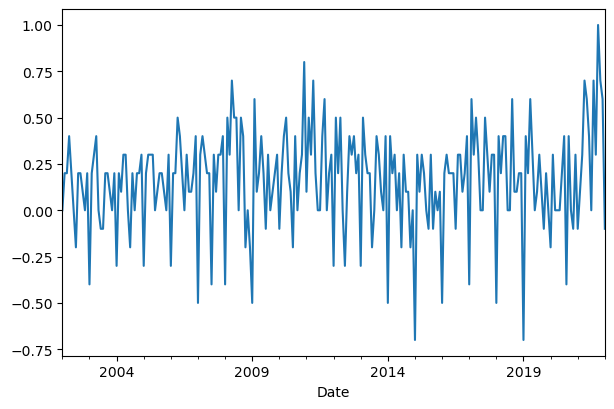

In [48]:
cpih_data["CPIH_diff"] = cpih_data["CPIH"] - cpih_data["CPIH"].shift(1)
cpih_data["CPIH_diff"].fillna(0, inplace=True)
cpih_data["CPIH_diff"].dropna().plot(figsize=(7, 4.5))

In [45]:
cpih_diff_adf_score = adf_test(cpih_data["CPIH_diff"])

Results of DF test:


MissingDataError: exog contains inf or nans